In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [26]:
df = pd.read_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\Well-6_01-07-2022.xlsx")

In [19]:
df.shape

(93493, 13)

In [3]:
train_date=pd.to_datetime(df['index'])

In [27]:
cols=['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']
cols

['TVA (m3)',
 'SPPA (kPa)',
 'MFOA (m3/s)',
 'MFOP ((m3/s)/(m3/s))',
 'GASA (mol/mol)',
 'STATUS']

In [28]:
df_training=df[cols].astype(float)

<Axes: >

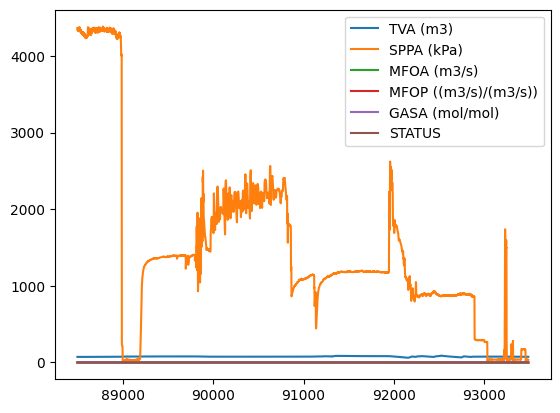

In [29]:
df_for_plot=df_training.tail(5000)
df_for_plot.plot.line()

In [30]:
scaler=StandardScaler()
scaler=scaler.fit(df_training)
df_train_scaled=scaler.transform(df_training)

In [31]:
df_training.shape

(93493, 6)

In [32]:
train_X=[]
train_Y=[]
n_future=1 #number of days we want to predict into the future 
n_past=36 #Number of past days we want to use to predict the future 
for i in range(n_past,len(df_train_scaled)-n_future+1):
    train_X.append(df_train_scaled[i-n_past:i,0:df_train_scaled.shape[1]])
    train_Y.append(df_train_scaled[i+n_future-1:i+n_future,5])

In [33]:
train_X,train_Y=np.array(train_X),np.array(train_Y)

In [18]:
model=Sequential()
model.add(LSTM(64,activation='relu',input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_Y.shape[1]))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(train_X,train_Y,epochs=10,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/10
5257/5257 [==============================] - 793s 147ms/step - loss: 6514.6865 - val_loss: 0.1437
Epoch 2/10
5257/5257 [==============================] - 693s 132ms/step - loss: 0.0680 - val_loss: 0.0870
Epoch 3/10
5257/5257 [==============================] - 585s 111ms/step - loss: 0.8049 - val_loss: 0.1539
Epoch 4/10
5257/5257 [==============================] - 486s 92ms/step - loss: 351551.4062 - val_loss: 5415.7070
Epoch 5/10
5257/5257 [==============================] - 490s 93ms/step - loss: 606.7117 - val_loss: 46.7020
Epoch 6/10
5257/5257 [==============================] - 421s 80ms/step - loss: 1079514112.0000 - val_loss: 2.0083
Epoch 7/10
5257/5257 [==============================] - 423s 81ms/step - loss: 2.5782 - val_loss: 1.5397
Epoch 8/10
5257/5257 [==============================] - 428s 81ms/step - loss: 14.3728 - val_loss: 1.2352
Epoch 9/10
5257/5257 [==============================] - 423s 81ms/step - loss: 1.4814 - val_loss: 1.1087
Epoch 10/10
5257/5257 [=====

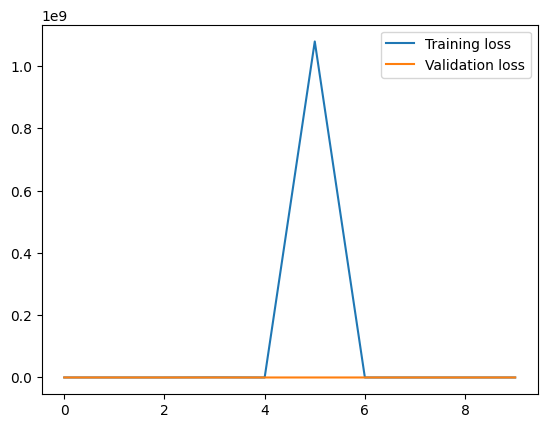

In [21]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()

In [34]:
n_future=60
forcast_period_dates=pd.date_range(list(train_date)[-1],periods=n_future,freq='id').tolist()


ValueError: Invalid frequency: id

In [23]:
train_X=[]
train_Y=[]
n_future=1 #number of days we want to predict into the future 
n_past=60 #Number of past days we want to use to predict the future 
for i in range(n_past,len(df_train_scaled)-n_future+1):
    train_X.append(df_train_scaled[i-n_past:i,0:df_train_scaled.shape[1]])
    train_Y.append(df_train_scaled[i+n_future-1:i+n_future,5])

In [24]:
train_X,train_Y=np.array(train_X),np.array(train_Y)

In [25]:
print(train_X.shape,train_Y.shape)

(93433, 60, 6) (93433, 1)


# Noramlisation 

In [9]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# define contrived series
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
series = Series(data)
print(series)



0     10.0
1     20.0
2     30.0
3     40.0
4     50.0
5     60.0
6     70.0
7     80.0
8     90.0
9    100.0
dtype: float64


In [11]:
# prepare data for normalization
values = series.values
print(values)
values = values.reshape((len(values), 1))
print(type(values))


[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
<class 'numpy.ndarray'>


In [15]:
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print(' Min: {}, Max: {} % '.format(scaler.data_min_, scaler.data_max_))


 Min: [10.], Max: [100.] % 
1


In [17]:
# normalize the dataset and print
normalized = scaler.transform(values)
print(normalized)


[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [18]:
# inverse transform and print
inversed = scaler.inverse_transform(normalized)
print(inversed)

[[ 10.]
 [ 20.]
 [ 30.]
 [ 40.]
 [ 50.]
 [ 60.]
 [ 70.]
 [ 80.]
 [ 90.]
 [100.]]


# Standardize Series Data

In [21]:
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt
# define contrived series
data = [1.0, 5.5, 9.0, 2.6, 8.8, 3.0, 4.1, 7.9, 6.3]
series = Series(data)
print(series)


0    1.0
1    5.5
2    9.0
3    2.6
4    8.8
5    3.0
6    4.1
7    7.9
8    6.3
dtype: float64


In [23]:
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
print(values)

[[1. ]
 [5.5]
 [9. ]
 [2.6]
 [8.8]
 [3. ]
 [4.1]
 [7.9]
 [6.3]]


In [26]:
# train the normalization
scaler = StandardScaler()
scaler = scaler.fit(values)

In [29]:
scaler.var_

array([7.35802469])

In [33]:
print( 'Mean: %f StandardDeviation: %f '%(scaler.mean_, sqrt(scaler.var_)))


Mean: 5.355556 StandardDeviation: 2.712568 


In [30]:
# normalize the dataset and print
standardized = scaler.transform(values)
print(standardized)


[[-1.60569456]
 [ 0.05325007]
 [ 1.34354035]
 [-1.01584758]
 [ 1.26980948]
 [-0.86838584]
 [-0.46286604]
 [ 0.93802055]
 [ 0.34817357]]


In [34]:
# inverse transform and print
inversed = scaler.inverse_transform(standardized)
inversed

array([[1. ],
       [5.5],
       [9. ],
       [2.6],
       [8.8],
       [3. ],
       [4.1],
       [7.9],
       [6.3]])